# Exploratory analysis of CIFAR-10 dataset

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10


## Load dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Display a sample of the images

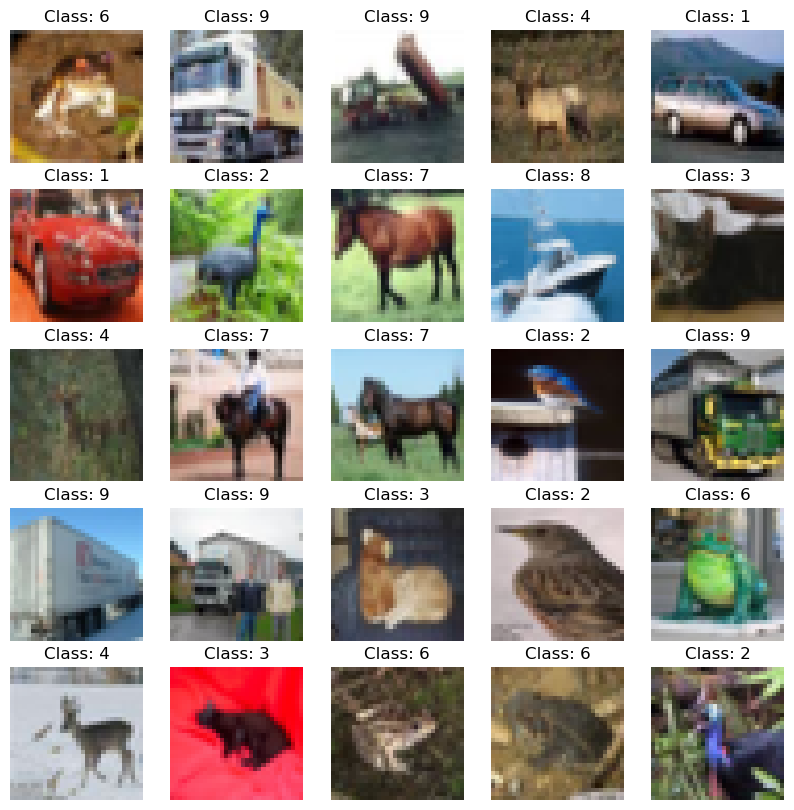

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Class: {y_train[i][0]}")
    plt.axis('off')
plt.show()

## Describe the dataset

In [4]:
print(f"Number of training examples: {len(x_train)}")
print(f"Number of test examples: {len(x_test)}")
print(f"Image shape: {x_train[0].shape}")
print(f"Unique labels: {np.unique(y_train)}")

Number of training examples: 50000
Number of test examples: 10000
Image shape: (32, 32, 3)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


The CIFAR-10 dataset is comprised of ten categories. Each image is 32x32 pixels, and are RGB colored. 

Read more about the dataset here: https://www.cs.toronto.edu/~kriz/cifar.html


## View the disctibution of the classes

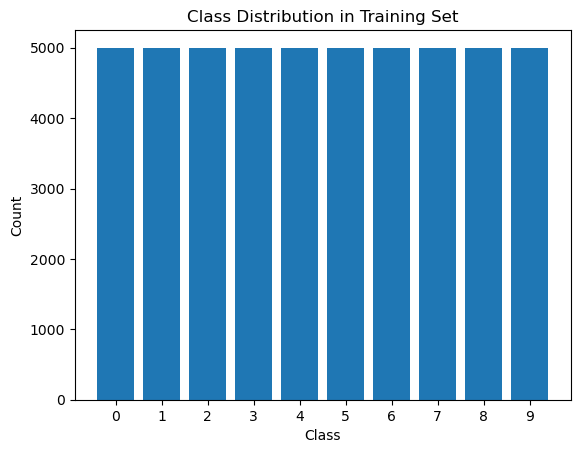

In [5]:
unique_classes, class_counts = np.unique(y_train, return_counts=True)
plt.bar(unique_classes, class_counts)
plt.xticks(unique_classes)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Each class are represented eaqually in the datase.

## Histograms of the colored channels

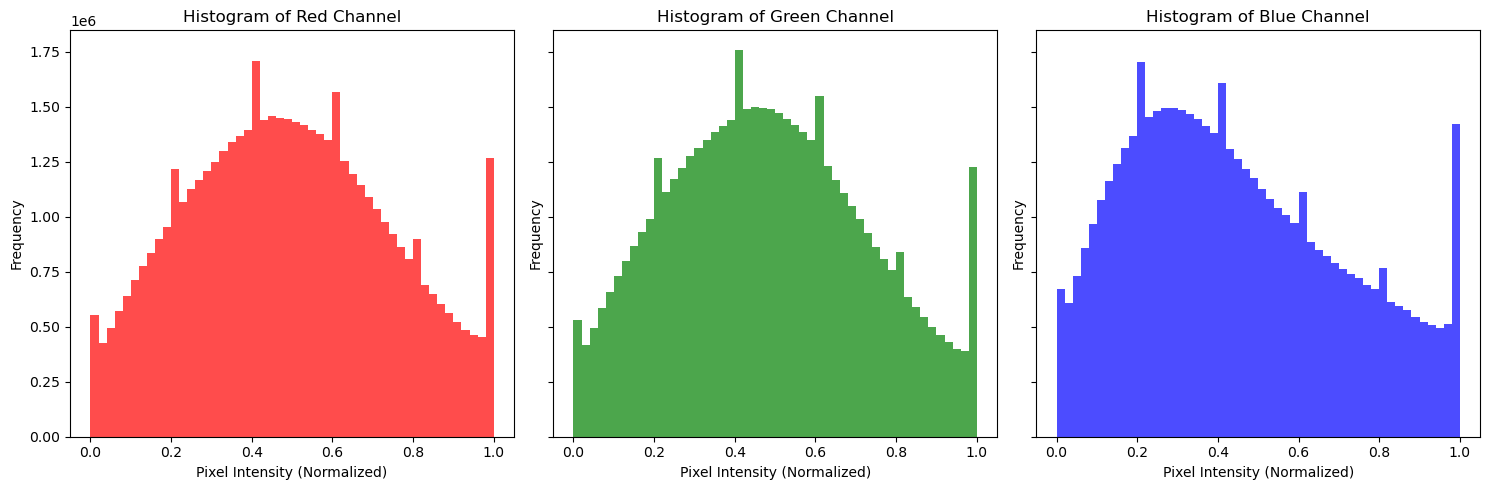

In [6]:
# Display histograms for each color channel
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for i, color in enumerate(['Red', 'Green', 'Blue']):
    # Flatten the color channel and normalize values
    channel_values = x_train[:, :, :, i].flatten() / 255.0
    
    axes[i].hist(channel_values, bins=50, color=color.lower(), alpha=0.7)
    axes[i].set_title(f'Histogram of {color} Channel')
    axes[i].set_xlabel('Pixel Intensity (Normalized)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Each channel has similar distribution of the colors. The blue is slightly more right-skewed than the others.

## Color Channel statistics

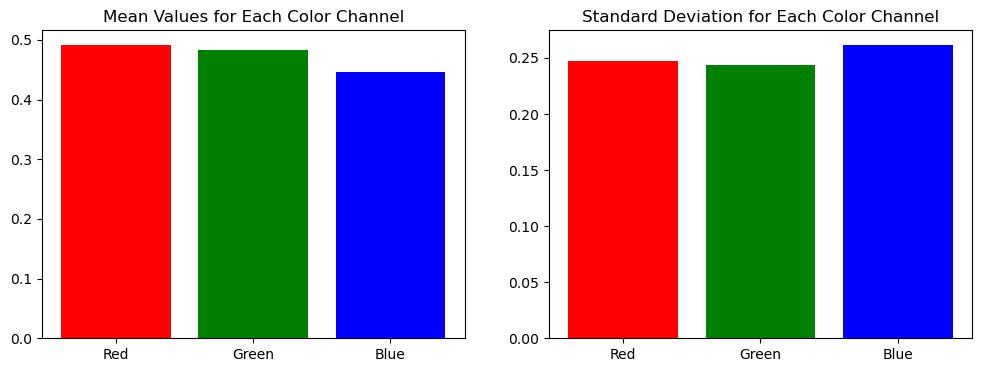

Mean values for each color channel: [0.49139968 0.48215841 0.44653091]
Standard deviation for each color channel: [0.24703223 0.24348513 0.26158784]


In [7]:
# Compute mean and standard deviation for each color channel
channel_means = np.mean(x_train, axis=(0, 1, 2)) / 255.0
channel_stds = np.std(x_train, axis=(0, 1, 2)) / 255.0

# Visualize mean and standard deviation
labels = ['Red', 'Green', 'Blue']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Mean
axes[0].bar(labels, channel_means, color=['red', 'green', 'blue'])
axes[0].set_title('Mean Values for Each Color Channel')

# Standard Deviation
axes[1].bar(labels, channel_stds, color=['red', 'green', 'blue'])
axes[1].set_title('Standard Deviation for Each Color Channel')

plt.show()

print("Mean values for each color channel:", channel_means)
print("Standard deviation for each color channel:", channel_stds)

These numbers represent the pixel intensity for each color channel (Red, Green, and Blue). The average brightness (mean, higher value means brighter) and variability (standard deviation, higher if more diverse color information or contrast) of pixel intensities across the dataset are represented on these graphs.

## Average image colors by categories

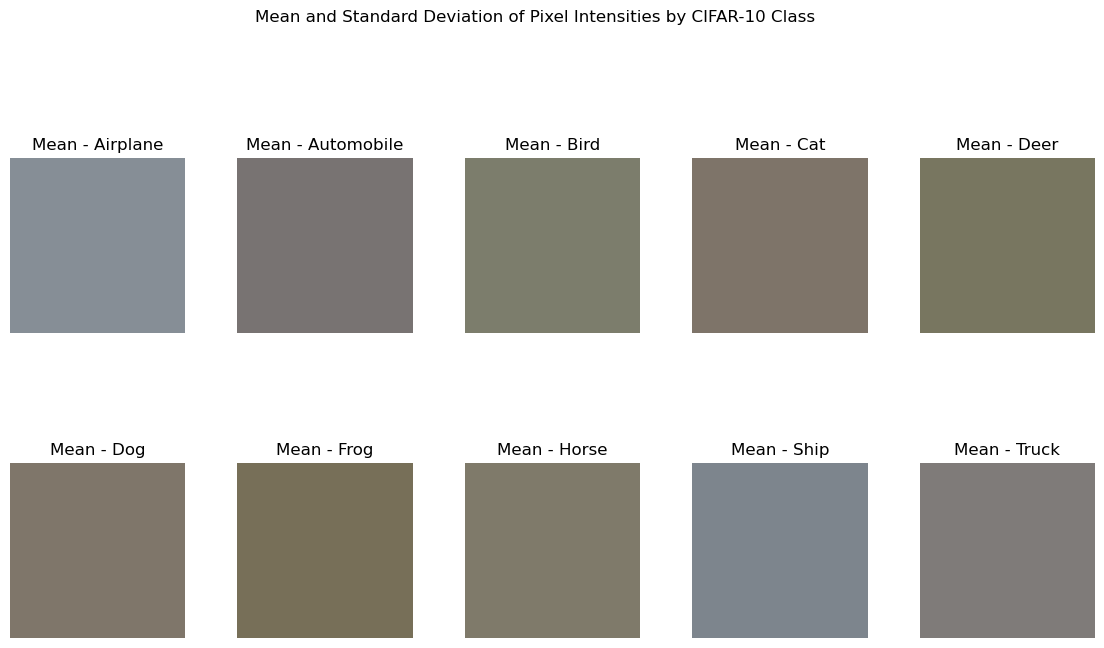

In [8]:
# Define class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Computing mean and standard deviation of pixel intensities for each class
class_pixel_stats = []

for cifar_class in range(10):
    class_images = x_train[y_train[:, 0] == cifar_class]
    class_mean = np.mean(class_images, axis=(0, 1, 2)) / 255.0
    class_std = np.std(class_images, axis=(0, 1, 2)) / 255.0
    class_pixel_stats.append((class_mean, class_std))

# Visualize the mean and standard deviation for each CIFAR-10 class
fig, axes = plt.subplots(2, 5, figsize=(14, 7))
fig.suptitle('Mean and Standard Deviation of Pixel Intensities by CIFAR-10 Class', y=1.05)

for i in range(2):
    for j in range(5):
        index = i * 5 + j
        class_mean_rgb = class_pixel_stats[index][0]
        class_std_rgb = class_pixel_stats[index][1]
        class_image = np.zeros((32, 32, 3), dtype=np.uint8)
        class_image[:, :, 0] = class_mean_rgb[0] * 255.0
        class_image[:, :, 1] = class_mean_rgb[1] * 255.0
        class_image[:, :, 2] = class_mean_rgb[2] * 255.0

        axes[i, j].imshow(class_image)
        axes[i, j].set_title(f'Mean - {class_names[index]}')
        axes[i, j].axis('off')

fig.subplots_adjust(wspace=0.3, hspace=0.3)

The average image colors arte brownish neutrals as expected from mixing all colors. However, there are certain noticeable properties:
- images from the categories 'Airplane' and 'Ship' are slightly bluish, as they are expect to have blue backgrounds (sky, sea),
- images from the categories 'Automobile' and 'Truck' are slightly greyish, likely due to the asphalt on the image,
- images from the categories 'Bird' and 'Deer' and 'Frog' are slightly greenish, likely due to the images taken in a forest-like environment.

## Image Variability

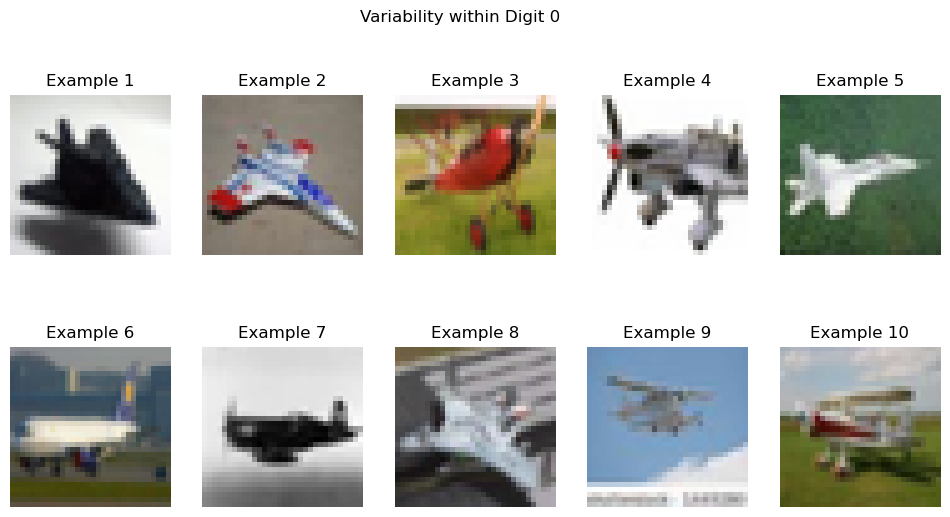

In [9]:
# Choosing a digit class to visualize 
selected_class = 0

# Get indices of images with the selected digit
digit_indices = np.where(y_train == selected_class)[0]

# Display multiple examples of the selected digit
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    index = digit_indices[i]
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Example {i + 1}")
    plt.axis('off')

plt.suptitle(f"Variability within Digit {selected_class}")
plt.show()

In the above figure, there are 10 examples of the category 0 from the dataset. These images depict airplanes. The resolution is unusually bad, because the image consists of only 32x32 pixels.